# Curse of Dimensionality

Some learning algorithms use a distance function to measure the similarity or dissimilarity of instances. Having many features corresponds to the instance "living" in a high-dimensional space. High dimensional data introduce difficulties, so called curse of dimensionality. However, by making some strong assumption about the data machine learning methods overcome these difficulties. First lets see the problems associated with high-dimensional data:

1. To "fill" a high dimensional space we need exponentially more samples.
- in one dimension, it is enough to have 9 labeled examples in the range (0,10), to make sure any new observation will be at a distance of `1` to our training data.
- in two dimensions, we need more than $9 \times 9$ labeled examples to satisfy the same condition.
- the number of required samples is $\mathcal{O}(9^D)$, where $D$ is the dimension.

2. In high dimension, it becomes harder to identify close neighbours. Let us demonstrate this with an example. We will generate random instances in various dimensions and measure the pairwise distance between these examples.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
np.random.seed(1234)

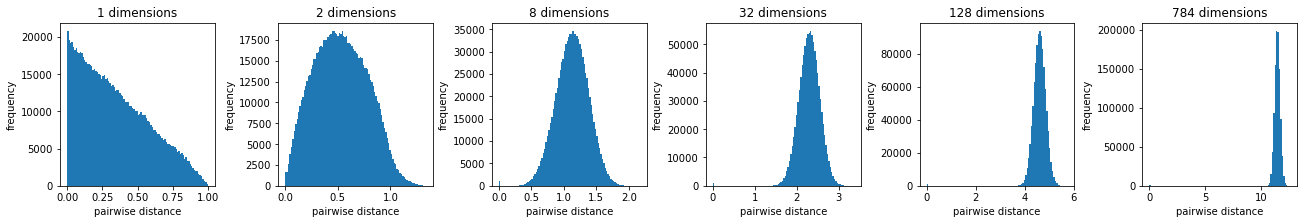

In [2]:
N = 1000                                #number of randomly generated points
Ds = [1, 2, 8, 32, 128, 784]            #array for different dimensions we'll consider
fig, axes = plt.subplots(ncols=len(Ds), nrows=1, constrained_layout=True, figsize=(len(Ds)*3, 3))
for i, D in enumerate(Ds):
    #generate random samples in a D dimensional space
    x = np.random.rand(N,D)
    #next compute the pairwise euclidean distance between the generated points (remember broadcasting?)
    dist = np.sqrt(np.sum((x[None,:,:] - x[:,None,:])**2, -1))
    axes[i].hist(dist.ravel(), bins=100)              #to plot a histogram
    axes[i].set_xlabel("pairwise distance")
    axes[i].set_ylabel("frequency")
    axes[i].set_title(f'{D} dimensions')
plt.show()
